# Лабораторная работа №7. Классификация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в виде файла rep.ipynb в ваш репозиторий github в директорию ./les07
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир.
1.	PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
2.	Survived – Выжил (0 – не выжил, 1 – выжил).
3.	Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
4.	Name – Имя (полное имя пассажира).
5.	Sex – Пол (male – мужчина, female – женщина).
6.	Age – Возраст (числовое значение, может быть дробным).
7.	SibSp – Количество родственников на борту (братьев, сестер или супругов).
8.	Parch – Количество родителей или детей на борту.
9.	Ticket – Номер билета.
10.	Fare – Стоимость билета (в фунтах стерлингов).
11.	Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
12.	Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [59]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0


## Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [60]:
# Код
url = 'https://raw.githubusercontent.com/Nickshoc/dap-2024/main/les07/data/titanic.csv'
df = pd.read_csv(url, index_col='PassengerId')
df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


2. Выведете первые 7 строк набора.

In [61]:
# Код
print(df.head(7))

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
7                                      McCarthy, Mr. Timothy J

### Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?
    

In [62]:
# Код
print("\nИнформация о типах данных:")
print(df.info())
print("\nПропущенные значения:")
print(df.isnull().sum())


Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None

Пропущенные значения:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [63]:
# Код
df_cleaned = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
print("\nДанные после удаления нечисловых признаков:")
print(df_cleaned.head())


Данные после удаления нечисловых признаков:
             Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S


5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [64]:
# Код

df['male'] = (df['Sex'] == 'male').astype('float64')
df['female'] = (df['Sex'] == 'female').astype('float64')
df = df.drop(columns=['Sex'])
df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,female
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0.0,1.0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1.0,0.0
888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0.0,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,1.0


6. Удалите строки, которые содержать хотя бы одно null значение.

In [65]:
# Код

df_cleaned = df_cleaned.dropna()
print(f"\nРазмер данных после удаления строк с пропусками: {df_cleaned.shape}")
df_cleaned


Размер данных после удаления строк с пропусками: (712, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,3,female,39.0,0,5,29.1250,Q
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S


## Исследование данных

4. Нормализуйте значения признака "Fare".

In [66]:
# Код

df_fare_age=df[['Age','Fare']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_fare_age)
df_fare_age = pd.DataFrame(scaled_data, columns=["Age","Fare"], index = df.index)
df = df[['Survived','Pclass','SibSp','Parch','female','male']].join(df_fare_age)
df.describe()

,Survived,Pclass,SibSp,Parch,female,male,Age,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,7.140000e+02,8.910000e+02
mean,0.383838,2.308642,0.523008,0.381594,0.352413,0.647587,2.388379e-16,3.987333e-18
std,0.486592,0.836071,1.102743,0.806057,0.477990,0.477990,1.000701e+00,1.000562e+00
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-2.016979e+00,-6.484217e-01
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-6.595416e-01,-4.891482e-01
50%,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,-1.170488e-01,-3.573909e-01
75%,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,5.718310e-01,-2.424635e-02
max,1.000000,3.000000,8.000000,6.000000,1.000000,1.000000,3.465126e+00,9.667167e+00


5. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [67]:
# Код
df.pivot_table('Fare', columns='Survived', aggfunc='mean')

Survived,0,1
Fare,-0.203085,0.326005


6. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

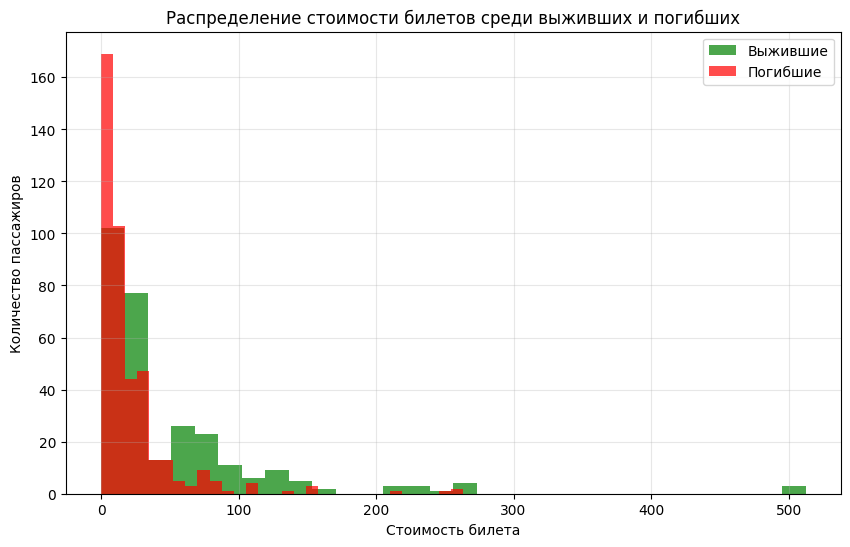

In [68]:
# Код

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned[df_cleaned['Survived'] == 1]['Fare'],
         bins=30, alpha=0.7, label='Выжившие', color='green')
plt.hist(df_cleaned[df_cleaned['Survived'] == 0]['Fare'],
         bins=30, alpha=0.7, label='Погибшие', color='red')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')
plt.title('Распределение стоимости билетов среди выживших и погибших')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

7. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [69]:
# Код
X = df_cleaned.drop('Survived', axis=1)
y = df_cleaned['Survived']


## Предсказательная модель

8. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [70]:
# Код
from sklearn.model_selection import train_test_split

X = df_cleaned.drop('Survived', axis=1)
y = df_cleaned['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42, stratify=y)
print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (534, 7)
Размер тестовой выборки: (178, 7)


9. Выполните обучение модели.

In [71]:
# Код
print(X_train.dtypes)
X_train = X_train.select_dtypes(include=['int64', 'float64'])
X_test = X_test.select_dtypes(include=['int64', 'float64'])
X_train, X_test = X_train.align(X_test, join='inner', axis=1)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4, algorithm='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


## Проверка модели

10. Выведите мартицу ошибок

In [72]:
# Код

from sklearn.metrics import confusion_matrix
model_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,83,23
1,40,32


11. Расчитайте accuracy

In [74]:
# Код

from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
round(model_accuracy,2)

0.65

12. Сделайте вывод о полученном результате

Вывод: Точность модели составила 65%, что говорит о низкой эффективности модели. Это может быть связано с данными, малой обученностью модели.

## Вопросы для защиты

1. Сформулируйте задачу классификации.

Задача классификации — задача, в которой множество объектов (ситуаций) необходимо разделить некоторым образом на классы, при этом задано конечное множество объектов, для которых известно, к каким классам они относятся (выборка), но классовая принадлежность остальных объектов неизвестна.


2. Перечислите типы классификации.


*   Бинарная классификация
*   Мультиклассовая классификация
*   Несбалансированная классификация

3. В чем особенность несбалансированной классификации?

Несбалансированная классификация относится к задачам классификации, в которых количество примеров в классах распределяется неравномерно.

4. В чем особенность мультиклассовой классификации?

Мультиклассовая классификация предполагает, что классов более двух.


5. В чем особенность бинарной классификации?

Бинарная классификация предполагает два возможных класса меток.


6. В чем особенность классификации по нескольким меткам?

Особенность классификации по нескольким меткам — возможность одновременного присвоения нескольких меток одному экземпляру.

7. Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?



*   Стратегия "Один против всех" (англ. One-vs-All, OvA или One-vs-Rest, OvR) — это подход в машинном обучении, используемый для решения многоклассовых задач классификации. Суть этой стратегии заключается в том, что для каждого класса создаётся отдельный бинарный классификатор, который решает, принадлежит ли объект этому классу или нет.
*   Стратегия "один против одного" (англ. One-vs-One, OvO) — это подход в машинном обучении, который используется для решения многоклассовых задач классификации. Он заключается в том, что для каждого возможного сочетания двух классов создаётся отдельный классификатор, способный различать только эти два класса.

8. Что такое матрица ошибок (несоответствий)?

Матрица ошибок  — это таблица, которая используется для визуализации и оценки эффективности модели классификации в машинном обучении.

9. Как рассчитывается Accuracy?

Accuracy = (TP + TN) / (TP + TN + FP + FN)

10. Объясните алгоритм классификации K-ближайших соседей.

Алгоритм KNN относит объект к тому классу, к которому принадлежит большинство из k его ближайших соседей в пространстве признаков. Основные этапы:

* Выбор метрики расстояния (евклидово, манхэттенское и др.)
* Выбор числа соседей k
* Поиск k ближайших объектов
* Голосование: объект относится к классу, который преобладает среди соседей